# Whoopwhoop let's predict agency!

### I'm going to do a sort of benchmark approach doing the following steps:

1. I assume agency moments start with I/we 'past tense verb'
2. Based on this criterion I will split the dataset into agency/non-agency
3. Check if it's true based on the CLAFF dataset. 

NB, a counterexample is  'I was happy when one of my day trade gave me good profit today. ,'

In [6]:
import numpy# as np
import pandas as pd


# import the dataframe
dataframe = pd.read_csv('../data/cleaned_hm.csv')

# import a list of irregular verbs (source https://languageonschools.com/english-irregular-verbs-list/)
irverbs = pd.read_csv('../data/irregularverbs.csv', delimiter = ';', names=['Present', 'Past simple', 'Past Participle'])

# words indicating self, sin/plu
agencywords = ['I', 'i', 'we', 'We']





ImportError: 
Importing the multiarray numpy extension module failed.  Most
likely you are trying to import a failed build of numpy.
If you're working with a numpy git repo, try `git clean -xdf` (removes all
files not under version control).  Otherwise reinstall numpy.

Original error was: cannot import name multiarray


In [2]:
irverbs.head()

Present Past simple Past Participle
0      am         was            been
1    beat        beat          beaten
2  become      became          become
3   begin       began           begun
4    bend        bent            bent

In [3]:
import spacy
import pandas as pd
import numpy as np
from collections import Counter
from glob import glob
import matplotlib.pyplot as plt
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import TfidfVectorizer

# Display plots in this notebook, instead of externally. 
from pylab import rcParams
rcParams['figure.figsize'] = 16, 8
%matplotlib inline

# The following are optional dependencies. 
# Feel free to comment these out. 
# Sent2tree uses the sent2tree.py module in this repository. 
# from sent2tree import sentenceTree
# import ete3 
# import seaborn

In [4]:
# This command might take a little while. 
nlp = spacy.load('en')

In [5]:
happymoments = open('../Original_data/happymoments.csv').read()

happymoments = happymoments[:999999] # make smaller
happymoments = nlp(unicode(happymoments))

In [6]:

next(happymoments.sents)

cleaned_hm;;
I went on a successful date with someone I felt sympathy and connection with.;;
I was happy when my son got 90% marks in his examination ;;
I went to the gym this morning and did yoga.

In [7]:
prideSentenceLengths = [len(sent) for sent in happymoments]
[sent for sent in happymoments if len(sent) == max(prideSentenceLengths)]

[https://www.youtube.com/watch?v=ptKgRecPi1I]

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1180ef850>,
      dtype=object)

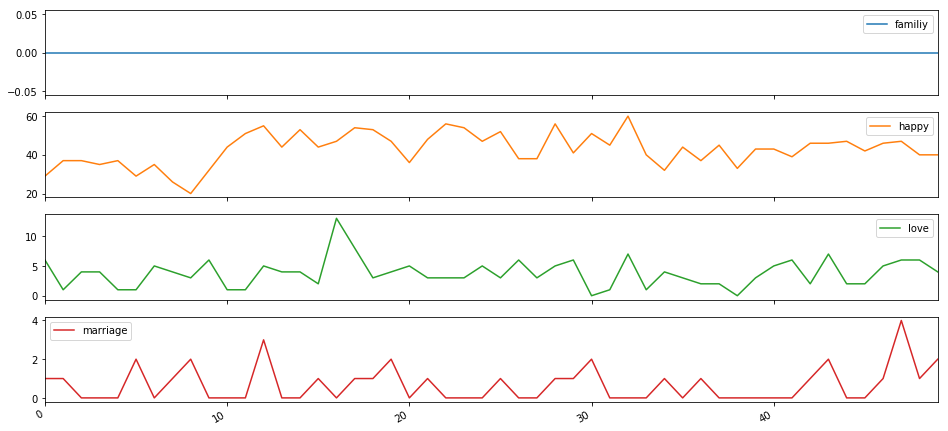

In [8]:
def locations(needle, haystack): 
    """ 
    Make a list of locations, bin those into a histogram, 
    and finally put it into a Pandas Series object so that we
    can later make it into a DataFrame. 
    """
    return pd.Series(np.histogram(
        [word.i for word in haystack 
         if word.text.lower() == needle], bins=50)[0])
# I have no idea why I have to keep running this. 
rcParams['figure.figsize'] = 16, 8

pd.DataFrame(
    {name: locations(name.lower(), happymoments) 
     for name in ['happy', 'familiy', 'marriage', 'love']}
).plot(subplots=True)

In [9]:
set([w.label_ for w in happymoments.ents])


{u'CARDINAL',
 u'DATE',
 u'EVENT',
 u'FAC',
 u'GPE',
 u'LANGUAGE',
 u'LAW',
 u'LOC',
 u'MONEY',
 u'NORP',
 u'ORDINAL',
 u'ORG',
 u'PERCENT',
 u'PERSON',
 u'PRODUCT',
 u'QUANTITY',
 u'TIME',
 u'WORK_OF_ART'}

In [10]:
[ent for ent in happymoments.ents if ent.label_ == 'ORDINAL']
# With this one I could distinghuish moments where first something didn't went quite well, and then afterwards it did.

[3rd,
 first,
 first,
 first,
 FIRST,
 first,
 first,
 first,
 second,
 first,
 first,
 first,
 first,
 first,
 third,
 first,
 first,
 first,
 7th,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 third,
 first,
 first,
 first,
 first,
 first,
 First,
 first,
 eighth,
 first,
 70th,
 first,
 25th,
 first,
 third,
 first,
 first,
 first,
 first,
 first,
 second,
 98th,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 second,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 second,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 10th,
 2nd,
 first,
 first,
 first,
 fourth,
 31st,
 2nd,
 first,
 first,
 first,
 8th,
 first,
 first,
 first,
 first,
 3rd,
 first,
 fifteenth,
 first,
 first,
 second,
 first,
 first,
 9th,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 4th,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 first,
 second,
 30th,
 first,
 first,
 3

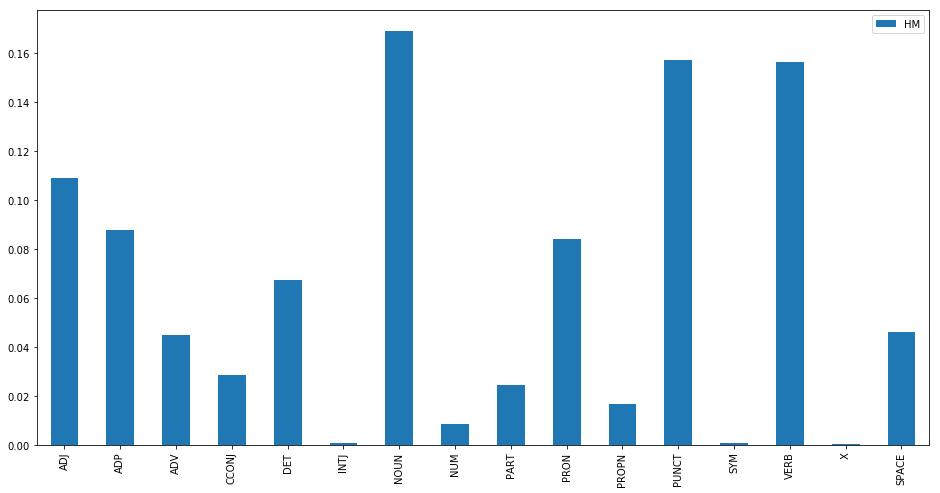

In [11]:
# Make a quick-and-dirty lookup table of POS IDs, 
# since the default representation of a POS is numeric. 
tagDict = {w.pos: w.pos_ for w in happymoments} 
tagDict

hmPOS = pd.Series(happymoments.count_by(spacy.attrs.POS))/len(happymoments)

rcParams['figure.figsize'] = 16, 8
df = pd.DataFrame([hmPOS], index=['HM'])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')


In [12]:
hmAdjs = [w for w in happymoments if w.pos_ == 'PRON']
Counter([w.string.strip() for w in hmAdjs]).most_common(10)

[(u'I', 9658),
 (u'me', 2801),
 (u'it', 1552),
 (u'i', 1138),
 (u'we', 783),
 (u'It', 570),
 (u'he', 515),
 (u'she', 440),
 (u'We', 344),
 (u'him', 292)]

In [13]:
agencySents = [sent for sent in happymoments.sents if ((sent[0].string == 'I ' or sent[0].string == 'We ' or sent[0].string == 'i ') and sent[1].tag_ == u'VBD') or sent[0].tag_ == u'VBD']
nonagencySents = [sent for sent in happymoments.sents if not (((sent[0].string == 'I ' or sent[0].string == 'We ' or sent[0].string == 'i ' or sent[0].string == '"') and sent[1].tag_ == u'VBD') or sent[0].tag_ == u'VBD')]

In [14]:
len(agencySents)

804

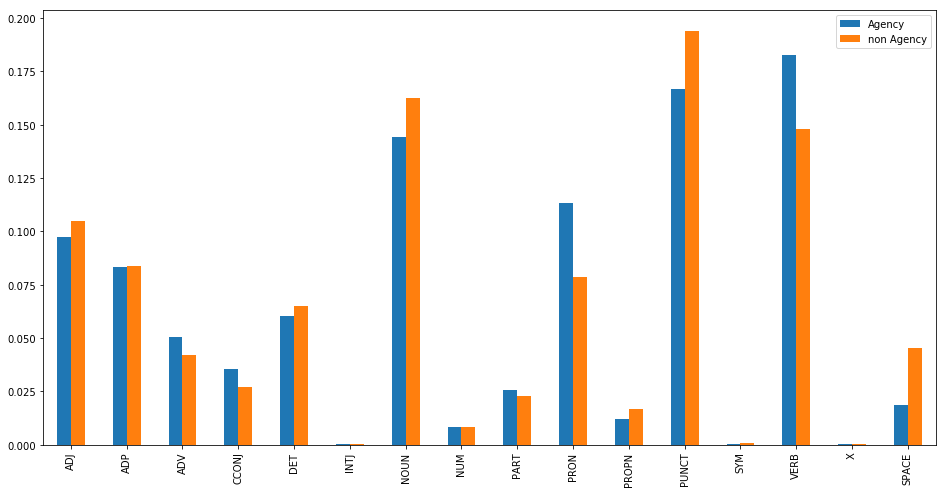

In [15]:
agencySents = nlp(unicode(agencySents))
nonagencySents = nlp(unicode(nonagencySents))
# Now I want to make some facts
tagDict = {w.pos: w.pos_ for w in happymoments} 
tagDict

agencyPOS = pd.Series(agencySents.count_by(spacy.attrs.POS))/len(agencySents)
nonagencyPOS = pd.Series(nonagencySents.count_by(spacy.attrs.POS))/len(nonagencySents)

rcParams['figure.figsize'] = 16, 8
df = pd.DataFrame([agencyPOS, nonagencyPOS], index=['Agency','non Agency' ])
df.columns = [tagDict[column] for column in df.columns]
df.T.plot(kind='bar')

In [17]:
#for word in nonagencySents[7]: 
 #   print(word, word.tag_, word.pos_)


Oké maar nu is natuurlijk de hamvraag: representeert het agency ook daadwerkelijk beter??? Lets find out...

Let's open the other file 

In [18]:
#hmid = open('../Claff_task/data/TRAIN/hmid_moment.csv').read()

IOError: [Errno 2] No such file or directory: '../Claff_task/data/TRAIN/hmid_moment.csv'

In [20]:
# labeled = labeled[:999999]
# labeled = nlp(unicode(labeled))

NameError: name 'labeled' is not defined

In [21]:
data = pd.read_csv('../Claff_task/data/TRAIN/labeled_10k.csv')

In [23]:
data.head()

hmid                                             moment          concepts  \
0  27674  I was happy when my son got 90% marks in his e...  education|family   
1  27685          went to movies with my friends it was fun     entertainment   
2  27691  A hot kiss with my girl friend last night made...           romance   
3  27701  My son woke me up to a fantastic breakfast of ...       family|food   
4  27712  My older daughter keeps patting my younger dau...            family   

  agency social   age country gender  married parenthood reflection  
0     no    yes  29.0     IND      m  married          y        24h  
1    yes    yes  29.0     IND      m   single          y        24h  
2    yes    yes  25.0     IND      m  married          y        24h  
3     no    yes    79     USA      f  widowed          y        24h  
4     no    yes    30     USA      f  married          y        24h

I'm going to make two datasets, one with the hmid linked to the agency, one with the hmid linked to the moment itself.

In [24]:
agencydata = data[['hmid', 'agency']]
momentdata = data[['hmid',  'moment']]

In [25]:
agencydata.head()

hmid agency
0  27674     no
1  27685    yes
2  27691    yes
3  27701     no
4  27712     no

In [26]:
momentdata.head()

hmid                                             moment
0  27674  I was happy when my son got 90% marks in his e...
1  27685          went to movies with my friends it was fun
2  27691  A hot kiss with my girl friend last night made...
3  27701  My son woke me up to a fantastic breakfast of ...
4  27712  My older daughter keeps patting my younger dau...

Alright, perfect.  So now we can do the same trick to the moment data where we try to separate it on agency measures just like before and then we can see what our precision will be like. Just looking at the heads of our datasets we can see that our little classification-rule would misclassify data entry 0 and 3, so precision would be 60% based on this anecdotual (?) insight.

Let's make a third column for our predicted agency:

In [29]:
momentdata['predicted agency'] = "no"

/Users/fijevanovereem/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [30]:
momentdata.head()

hmid                                             moment predicted agency
0  27674  I was happy when my son got 90% marks in his e...               no
1  27685          went to movies with my friends it was fun               no
2  27691  A hot kiss with my girl friend last night made...               no
3  27701  My son woke me up to a fantastic breakfast of ...               no
4  27712  My older daughter keeps patting my younger dau...               no

In [31]:
momentdata['moment'].to_csv('moments_labeled')

spacyseries = nlp(unicode(momentdata['moment']))

print(spacyseries[:200])

0        I was happy when my son got 90% marks in his e...
1                went to movies with my friends it was fun
2        A hot kiss with my girl friend last night made...
3        My son woke me up to a fantastic breakfast of ...
4        My older daughter keeps patting my younger dau...
5            I cooked my girlfriend a wonderful breakfast.
6           My Mother gave me a surprise visit at my home.
7        There was hardly any traffic on my way to work...
8                       I came to my office at right time.
9        The day I got my degree in industrial engineering
10       I went to office hour of one of my professors,...
11       We all ladies member from my family went for a...
12       When my wife came home from work and we shared...
13                          My father bought me a bicycle.
14       I went to my home and given an Ice Cream Famil...



In [32]:
import nltk
series = momentdata['moment']
series.to_csv('moments_labeled3.csv', index=None)
moments_labeled =  pd.read_csv('moments_labeled3.csv', names=['moments'])
moments_labeled['moments']
moments_labeled["unigrams"] = moments_labeled["moments"].apply(nltk.word_tokenize)
#moments_labeled['spacy moment'] = moments_labeled['moments'].apply(nlp)

In [33]:
moments_labeled

agencySents2 = [sent for sent in moments_labeled['unigrams'] if ((sent[0] == 'I ' or sent[0] == 'We ' or sent[0] == 'i ') and nltk.pos_tag(sent[1]) == 'VP')]
len(agencySents2)

0

In [34]:
moments_labeled = open('moments_labeled3.csv').read()
moments_labeled
#happymoments = happymoments[:999999] # make smaller
#moments_labeled = nlp(unicode(moments_labeled))


'I was happy when my son got 90% marks in his examination\nwent to movies with my friends it was fun\nA hot kiss with my girl friend last night made my day\n"My son woke me up to a fantastic breakfast of eggs, his special hamburger patty and pancakes."\nMy older daughter keeps patting my younger daughter\'s head.\nI cooked my girlfriend a wonderful breakfast.\nMy Mother gave me a surprise visit at my home.\nThere was hardly any traffic on my way to work this morning.\nI came to my office at right time.\nThe day I got my degree in industrial engineering\n"I went to office hour of one of my professors, and I realized that he was the most caring professor/mentor ever."\nWe all ladies member from my family went for a lunch at seven star hotel n it was so much fun when all ladies go together n gossip\nWhen my wife came home from work and we shared a steak dinner together with a bottle of wine.\nMy father bought me a bicycle.\nI went to my home and given an Ice Cream Family pack to my family

In [35]:
counter = 0
for sent in moments_labeled.sents:
    print('counter:  ', counter)
    print(sent)
    counter +=1
    if counter > 10: break
        


AttributeError: 'str' object has no attribute 'sents'

In [36]:
moments_labeled = [sent.string.strip() for sent in moments_labeled]
moments_labeled
# agencySents = [sent for sent in moments_labeled.sents if ((sent[0].string == 'I ' or sent[0].string == 'We ' or sent[0].string == 'i ') and sent[1].tag_ == u'VBD') or sent[0].tag_ == u'VBD']
# len(agencySents)


AttributeError: 'str' object has no attribute 'string'

In [37]:
for sent in agencySents: 
    momentdata.loc[momentdata['moment']+'\n' == sent.string, ['predicted agency']] = 'yes'

/Users/fijevanovereem/anaconda2/lib/python2.7/site-packages/pandas/core/indexing.py:517: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [ ]:
momentdata['predicted agency'].describe()

In [ ]:
momentdata

In [ ]:
agencydata['agency'].describe()

The amounts of yes/no are not so similar!

In [ ]:
predictioneval = momentdata['predicted agency'] == agencydata['agency']

In [ ]:
predictioneval.describe()

So we see that in fact the accuracy is around 60% already, whooptiedo. Now it's time to see where and when we can improve. Let's print some of the sentences where we made a bad prediction to gain some insights:

In [ ]:
momentdata['prediction eval'] = predictioneval

In [38]:
momentdata.head()

hmid                                             moment predicted agency
0  27674  I was happy when my son got 90% marks in his e...               no
1  27685          went to movies with my friends it was fun               no
2  27691  A hot kiss with my girl friend last night made...               no
3  27701  My son woke me up to a fantastic breakfast of ...               no
4  27712  My older daughter keeps patting my younger dau...               no

In [28]:
momentdata.loc[momentdata['prediction eval'] == False]

KeyError: 'prediction eval'

Apparently I do not select every sentence where my criterion holds, which is very annoying. So maybe we should go and check that first.